In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import BaggingClassifier

basePre = pd.read_csv('./bases/base_pre.csv')
baseScaled = pd.read_csv('./bases/base_scaled.csv')
basePCACompleta = pd.read_csv('./bases/base_train_completa.csv')
basePCAInversa = pd.read_csv('./bases/base_train_correlacao_inversa.csv')
basePCAProporcional = pd.read_csv('./bases/base_train_correlacao_proporcional.csv')
basePca70 = pd.read_csv('./bases/base_train_70.csv')
basePca50 = pd.read_csv('./bases/base_train_50.csv')

n = 2
cv = 5
clf = knn(n_neighbors=n)

clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

SINGLE EXECUTION

Applying in baseScaled

In [60]:
Y = basePre['target']

x_train, x_test, y_train, y_test = train_test_split(baseScaled, Y, test_size=0.30, random_state=0)

clf = knn(n_neighbors=n)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [61]:
sc = cross_val_score(clf, baseScaled, Y, cv=cv)

In [62]:
accArray = np.array([[sc.mean(), sc.std()*2]])

Applying in basePCAInversa

In [63]:
x_train, x_test, y_train, y_test = train_test_split(basePCAInversa, Y, test_size=0.30, random_state=0)

clf = knn(n_neighbors=n)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [64]:
sc = cross_val_score(clf, basePCAInversa, Y, cv=cv)

In [65]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

Applying in basePCAProporcional

In [66]:
x_train, x_test, y_train, y_test = train_test_split(basePCAProporcional, Y, test_size=0.30, random_state=0)

clf = knn(n_neighbors=n)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [67]:
sc = cross_val_score(clf, basePCAProporcional, Y, cv=cv)

In [68]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA  com 70%

In [69]:
x_train, x_test, y_train, y_test = train_test_split(basePca70, Y, test_size=0.30, random_state=0)

clf = knn(n_neighbors=n)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [70]:
sc = cross_val_score(clf, basePca70, Y, cv=cv)

In [71]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

PCA com 50%

In [72]:
x_train, x_test, y_train, y_test = train_test_split(basePca50, Y, test_size=0.30, random_state=0)

clf = knn(n_neighbors=n)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [73]:
sc = cross_val_score(clf, basePca50, Y, cv=cv)

In [74]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [75]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [76]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,75.0,6.0
1,74.0,4.0
2,64.0,10.0
3,74.0,5.0
4,72.0,8.0


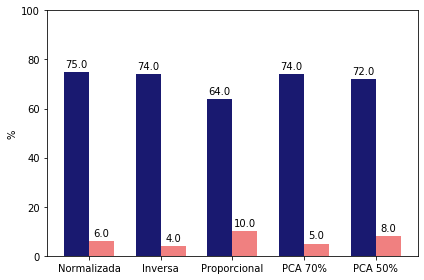

In [77]:
from plt import *

single(dfAcc, 'knnSingle.png', '#191970', '#F08080')

BAGGING com a melhor single

In [78]:
clf = knn(n_neighbors=n)

model = BaggingClassifier(clf, n_estimators=5, random_state=0)

sc = cross_val_score(model, baseScaled, Y, cv=cv)

In [79]:
accArray = np.array([[sc.mean(), sc.std()*2]])

In [80]:
clf = knn(n_neighbors=n)

model = BaggingClassifier(clf, n_estimators=10, random_state=0)

sc = cross_val_score(model, baseScaled, Y, cv=cv)

In [81]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [82]:
clf = knn(n_neighbors=n)

model = BaggingClassifier(clf, n_estimators=20, random_state=0)

sc = cross_val_score(model, baseScaled, Y, cv=cv)

In [83]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [84]:
clf = knn(n_neighbors=n)

model = BaggingClassifier(clf, n_estimators=30, random_state=0)

sc = cross_val_score(model, baseScaled, Y, cv=cv)

In [85]:
accArray = np.append(accArray, [[sc.mean(), sc.std()*2]], axis=0)

In [86]:
dfAcc = pd.DataFrame(accArray, columns=['mean', 'std'], index=None)

In [87]:
dfAcc = (dfAcc*100).apply(np.floor)
dfAcc

,mean,std
0,76.0,5.0
1,74.0,11.0
2,76.0,10.0
3,77.0,11.0


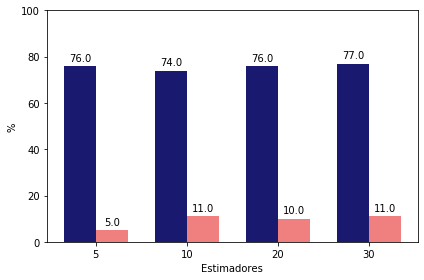

In [88]:
bagging(dfAcc, 'knnBagging.png', '#191970', '#F08080')